In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing libraries for data visualisation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 2)

## Read csv files into train and test datasets

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


## Basic EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00e+00,-5.01e-03,-0.04,0.04,-0.06,-1.65e-03,0.01
Survived,-5.01e-03,1.00e+00,-0.34,-0.08,-0.04,8.16e-02,0.26
Pclass,-3.51e-02,-3.38e-01,1.00,-0.37,0.08,1.84e-02,-0.55
Age,3.68e-02,-7.72e-02,-0.37,1.00,-0.31,-1.89e-01,0.10
SibSp,-5.75e-02,-3.53e-02,0.08,-0.31,1.00,4.15e-01,0.16
Parch,-1.65e-03,8.16e-02,0.02,-0.19,0.41,1.00e+00,0.22
Fare,1.27e-02,2.57e-01,-0.55,0.10,0.16,2.16e-01,1.00


## Check for NAN

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.drop(['Cabin', 'PassengerId', 'Ticket'], axis = 1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


## Dealing with NA.
Two stations had no value therefore they were replaced by the most prevalent station in the dataset ("C")

In [10]:
train_data.fillna(train_data.mean(), inplace=True)
train_data['Embarked'].fillna('C', inplace=True)
train_data.isnull().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Basic EDA

#### Sex vs survival rate

In [11]:
survived_vs_sex = train_data.groupby(['Sex', 'Survived']).size()
survived_vs_sex

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

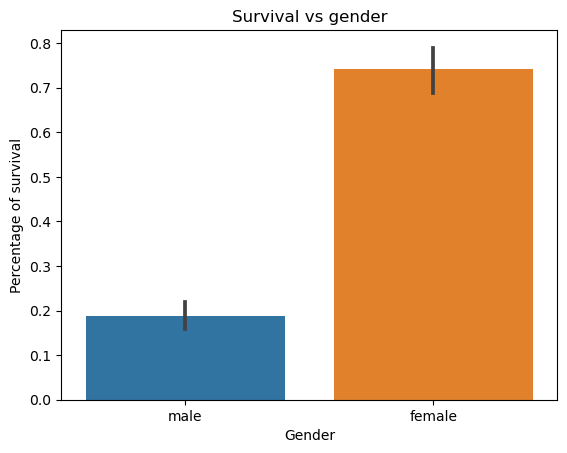

In [12]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival vs gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of survival')
plt.show()

In [13]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


In [14]:
train_data[['Survived', 'Age']].mean()

Survived     0.38
Age         29.70
dtype: float64

In [15]:
mean_age_men = train_data[train_data['Sex'] == 'male']['Age'].mean()
mean_age_women = train_data[train_data['Sex'] == 'female']['Age'].mean()
print(f"Average age for men: {mean_age_men}\nAverage age for women: {mean_age_women}")

Average age for men: 30.505824243042102
Average age for women: 28.21673004870738


## Average fare payed and general socio-economic status vs survival

Mean class ticket for men: 2.389948006932409
Mean class ticket for women: 2.159235668789809


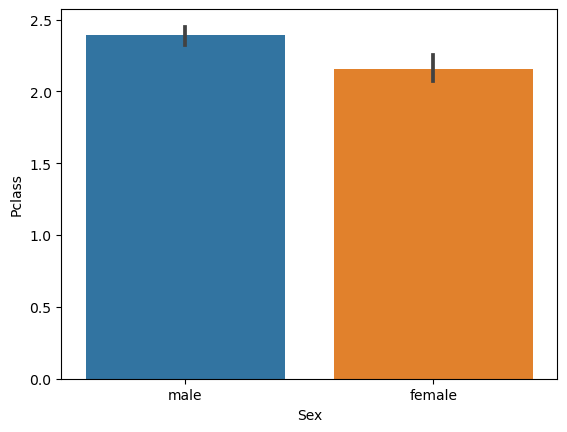

In [16]:
pclass_men = train_data[train_data['Sex'] == 'male']['Pclass'].mean()
pclass_women = train_data[train_data['Sex'] == 'female']['Pclass'].mean()
print(f"Mean class ticket for men: {pclass_men}\nMean class ticket for women: {pclass_women}")

sns.barplot(x='Sex', y='Pclass', data=train_data)
plt.show()

In [17]:
fare_men = train_data[train_data['Sex'] == 'male']['Fare'].mean()
fare_women = train_data[train_data['Sex'] == 'female']['Fare'].mean()
print(f"Mean class ticket for men: {fare_men}\nMean class ticket for women: {fare_women}")

Mean class ticket for men: 25.523893414211443
Mean class ticket for women: 44.47981783439491


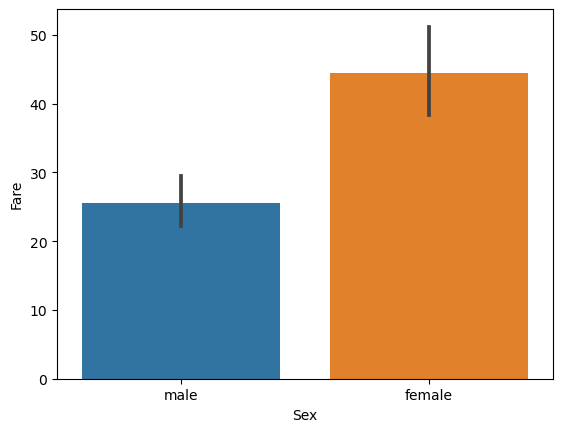

In [18]:
sns.barplot(x='Sex', y='Fare', data=train_data)
plt.show()

In [19]:


female_1st = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 1)]['Pclass'].count()
male_1st = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 1)]['Pclass'].count()

print(f'Percentage of males with 1st class ticket: {(male_1st / 577) * 100} \nPercentage of females with 1st class ticket: {(female_1st / 314) * 100}')

female_2nd = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 2)]['Pclass'].count()
male_2nd = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 2)]['Pclass'].count()

print(f'Percentage of males with 2nd class ticket: {(male_2nd / 577) * 100} \nPercentage of females with 2nd class ticket: {(female_2nd / 314) * 100}')

female_3rd = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 3)]['Pclass'].count()
male_3rd = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 3)]['Pclass'].count()

print(f'Percentage of males with 3rd class ticket: {(male_3rd / 577) * 100} \nPercentage of females with 3rd class ticket: {(female_3rd / 314) * 100}')

male_max_fare = train_data[train_data['Sex'] == 'male']['Fare'].max()
male_min_fare = train_data[train_data['Sex'] == 'male']['Fare'].min()
female_max_fare = train_data[train_data['Sex'] == 'female']['Fare'].max()
female_min_fare = train_data[train_data['Sex'] == 'female']['Fare'].min()

print(f'Maximum and minimum fare payed by men: {male_max_fare}, {male_min_fare}\nMaximum and minimum fare payed by women: {female_max_fare}, {female_min_fare}')

first_max = train_data[train_data['Pclass'] == 1]['Fare'].max()
first_min = train_data[train_data['Pclass'] == 1]['Fare'].min()

print(f'1st Class maximum and minimum fare: {first_max}, {first_min}')

Percentage of males with 1st class ticket: 21.143847487001732 
Percentage of females with 1st class ticket: 29.936305732484076
Percentage of males with 2nd class ticket: 18.717504332755635 
Percentage of females with 2nd class ticket: 24.203821656050955
Percentage of males with 3rd class ticket: 60.13864818024264 
Percentage of females with 3rd class ticket: 45.85987261146497
Maximum and minimum fare payed by men: 512.3292, 0.0
Maximum and minimum fare payed by women: 512.3292, 6.75
1st Class maximum and minimum fare: 512.3292, 0.0


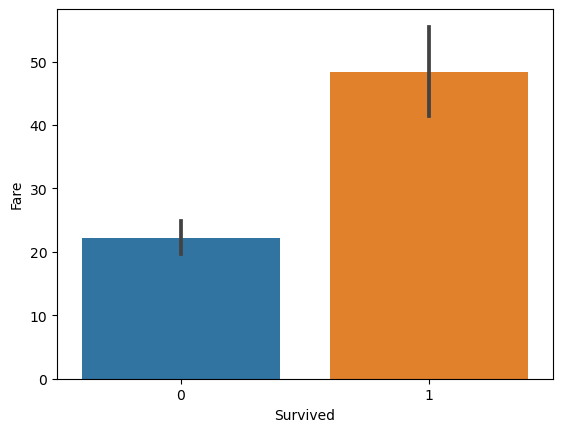

In [20]:
sns.barplot(y='Fare', x='Survived', data=train_data)
plt.show()

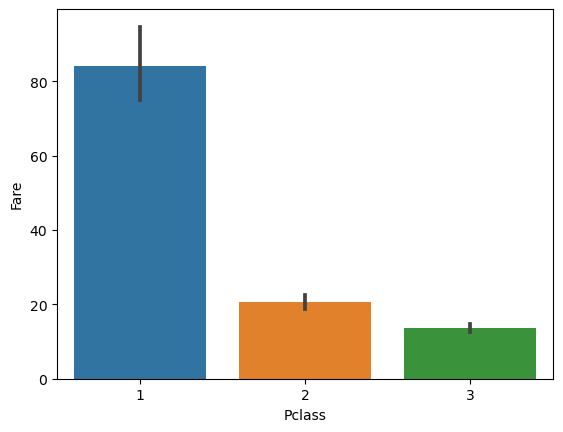

In [21]:
sns.barplot(y='Fare', x='Pclass', data=train_data)
plt.show()

### Is there correlation between station and price payed for ticket and survival rate?

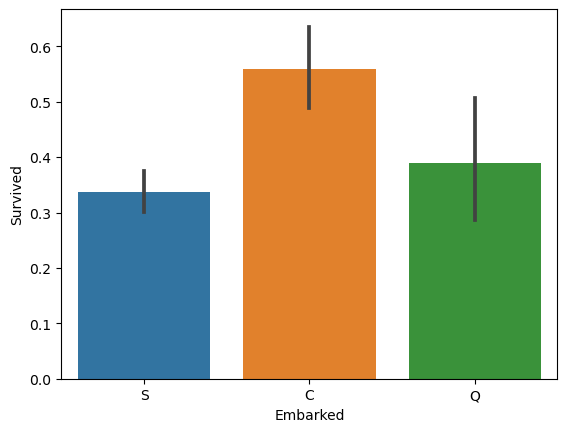

In [22]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.show()

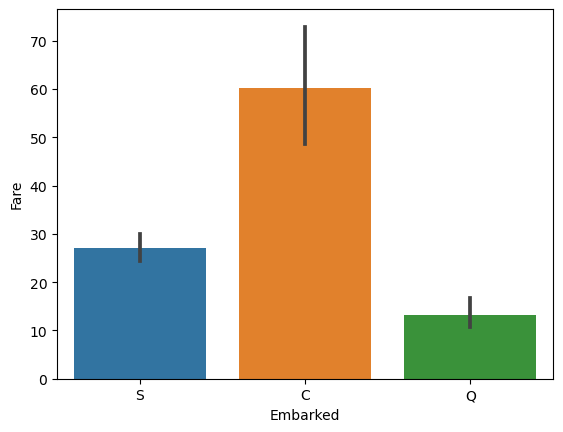

In [23]:
sns.barplot(x='Embarked', y='Fare', data=train_data)
plt.show()

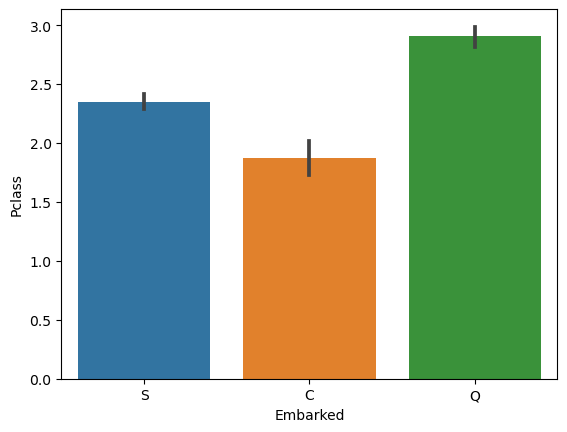

In [24]:
sns.barplot(x='Embarked', y='Pclass', data=train_data)
plt.show()

## Model training:

#### A decision tree was used to predict the survival rate.

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### Features selected for training

In [26]:
features_forest = ['Sex', 'Embarked', 'Pclass', 'Parch', 'SibSp']

#### Dummy creation

In [27]:
X_train_forest = pd.get_dummies(train_data[features_forest])
X_test_forest = pd.get_dummies(test_data[features_forest])

In [28]:
y = train_data['Survived']

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [30]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train_forest, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [31]:
predictions = tree_cv.predict(X_test_forest)

In [32]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [33]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
